In [ ]:
# Import the 'os' module for interacting with the operating system (e.g., file paths, environment variables)
import os  

# Import pandas library (pd) for data manipulation and analysis (tables, CSVs, etc.)
import pandas as pd  

# Import numpy (np) for numerical operations (arrays, matrices, math functions)
import numpy as np  

# Import matplotlib's pyplot (pt) for creating plots and visualizations
import matplotlib.pyplot as pt  

# Import preprocessing tools from scikit-learn:
# - LabelEncoder: converts categorical labels (text) into numerical form
# - StandardScaler: standardizes features by removing mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder, StandardScaler  

# Import commonly used Keras layers for deep learning:
# - Conv2D: Convolutional layer (used for image processing)
# - Dense: Fully connected (standard) neural network layer
# - MaxPooling2D: Downsamples feature maps (reduces size, keeps important info)
# - Dropout: Randomly drops neurons during training to prevent overfitting
# - Flatten: Flattens multidimensional arrays to 1D vectors
# - Input: Defines input shape for a model
# - Concatenate: Combines outputs from multiple layers/models
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, Input, Concatenate  

# Import 'to_categorical' utility to convert class labels (integers) into one-hot encoded vectors
from keras.utils import to_categorical  

# Import Keras model types:
# - Model: The functional API model (flexible, allows complex architectures)
# - Sequential: The sequential model (stack layers in a linear order)
from keras.models import Model, Sequential  

# Import Optimizer base class (used for customizing or specifying optimization algorithms in training)
from keras.optimizers import Optimizer  


In [ ]:
# Read the dataset "socal2.csv" into a pandas DataFrame called 'Model_dataset'
# - pd.read_csv() loads CSV files into a structured table for analysis and preprocessing
Model_dataset = pd.read_csv("socal2.csv")  

# Display the first 5 rows of the dataset
# - Useful for quickly inspecting data structure, column names, and sample values
Model_dataset.head()  


,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [ ]:
# Rename columns for clarity
Model_dataset.rename(columns={"citi": "city", "n_citi": "city_num"}, inplace=True)  

# Show first 5 rows of the updated dataset
Model_dataset.head()  


,image_id,street,city,city_num,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [ ]:
# Generate summary statistics for numerical columns
Model_dataset.describe()  

# Count non-null values in each column
Model_dataset.count()  


image_id    15474
street      15474
city        15474
city_num    15474
bed         15474
bath        15474
sqft        15474
price       15474
dtype: int64

In [ ]:
# Create label encoders for 'street' and 'city' columns
L_street = LabelEncoder()
L_city = LabelEncoder()

# Encode 'city' column with numerical labels
Model_dataset["city"] = L_city.fit_transform(Model_dataset["city"])

# Encode 'street' column with numerical labels
Model_dataset["street"] = L_street.fit_transform(Model_dataset["street"])

# Show first 5 rows of the updated dataset
Model_dataset.head()


,image_id,street,city,city_num,bed,bath,sqft,price
0,0,1552,317,317,3,2.0,1560,201900
1,1,1184,48,48,3,2.0,713,228500
2,2,4565,152,152,3,1.0,800,273950
3,3,10920,48,48,3,1.0,1082,350000
4,4,4346,55,55,4,3.0,2547,385100


In [ ]:
# Select feature columns and convert them into a NumPy array
tabular_Data = Model_dataset[["street", "city", "city_num", "bed", "bath", "sqft"]].values  

# Select target column ('price') and convert it into a NumPy array
y = Model_dataset["price"].values  


In [ ]:
# Initialize a StandardScaler to normalize feature values
scalar = StandardScaler()  

# Fit the scaler on features and transform them to standardized values
tabular_Data = scalar.fit_transform(tabular_Data)  


In [ ]:
# Import OpenCV library for image processing
import cv2  

# Define image directory and target size
img_dir = "socal_pics"  
img_size = (128, 128)  

# Initialize an empty list to store processed images
images = []  

# Loop through each image ID in the dataset
for i in Model_dataset["image_id"]:  
    img_Pth = os.path.join(img_dir, f"{i}.jpg")  # Build image file path
    img = cv2.imread(img_Pth)  # Read the image
    img = cv2.resize(img, img_size)  # Resize image to target size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format
    images.append(img)  # Add processed image to the list

# Convert list of images to NumPy array and normalize pixel values (0–1)
images = np.array(images, dtype="float32") / 255  


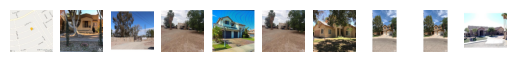

In [ ]:
# Set figure size for displaying images
pt.Figure(figsize=(20, 20))  

# Number of images to display
n = 10  

# Loop through first 'n' images
for i in range(n):  
    pt.subplot(2, n, i + 1)  # Define subplot position
    pt.imshow(images[i])  # Show image
    pt.axis("off")  # Hide axis for cleaner view

# Display the plotted images
pt.show()  


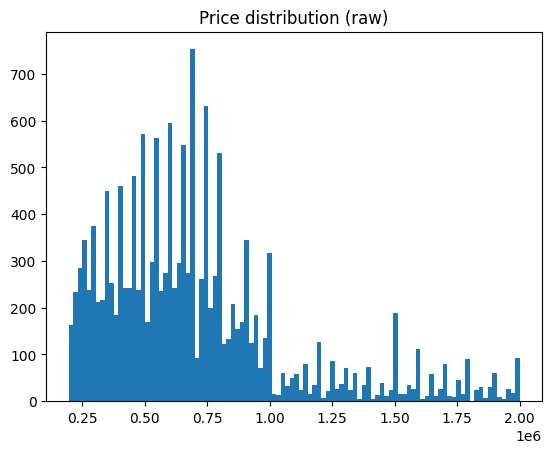

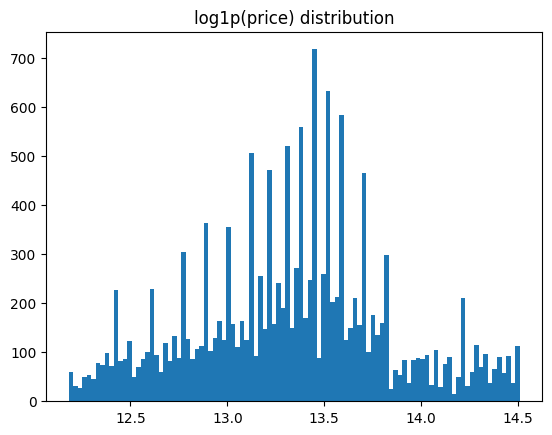

Baseline MAE (median): 270798.70524751197
Baseline MAE (log): 0.40267131146834184


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
# assume y is your original price array
plt.hist(y, bins=100)
plt.title("Price distribution (raw)"); plt.show()

y_log = np.log1p(y)   # training target
plt.hist(y_log, bins=100)
plt.title("log1p(price) distribution"); plt.show()

# baseline using median (raw)
median_pred = np.median(y)
baseline_mae = mean_absolute_error(y, np.full_like(y, median_pred))
print("Baseline MAE (median):", baseline_mae)

# baseline in log space (for comparison after log transform)
median_log = np.median(y_log)
baseline_mae_log = mean_absolute_error(y_log, np.full_like(y_log, median_log))
print("Baseline MAE (log):", baseline_mae_log)


In [ ]:
from sklearn.model_selection import train_test_split

# use y_log for training
X_img_train, X_img_test, X_tab_train, X_tab_test, y_train, y_test = train_test_split(
    images, tabular_Data, y_log, test_size=0.2, random_state=101
)

print(X_img_train.shape, X_tab_train.shape, y_train.shape)


(12379, 128, 128, 3) (12379, 6) (12379,)


In [ ]:
images.shape    # TODO: explain this line

(15474, 128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# image input
img_rows, img_cols, channels = 128,128,3
img_input = layers.Input(shape=(img_rows, img_cols, channels), name="img_input")

# data augmentation (in-model)
x = layers.RandomFlip("horizontal")(img_input)
x = layers.RandomRotation(0.07)(x)
x = layers.RandomZoom(0.05)(x)

# # pretrained backbone
# backbone = EfficientNetB0(include_top=False, input_tensor=x, weights='imagenet')
# backbone.trainable = False   # freeze initially

# x = backbone.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

# tabular branch
tab_input = layers.Input(shape=(X_tab_train.shape[1],), name="tab_input")
y = layers.Dense(64, activation="relu")(tab_input)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.2)(y)

# combine
combined = layers.Concatenate()([x, y])
z = layers.Dense(64, activation="relu")(combined)
z = layers.Dropout(0.2)(z)
z = layers.Dense(1, name="output")(z)  # regression on log(price)

model = Model(inputs=[img_input, tab_input], outputs=z)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_input           │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip_1       │ (None, 128, 128,  │          0 │ img_input[0][0]   │
│ (RandomFlip)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation_1   │ (None, 128, 128,  │          0 │ random_flip_1[0]… │
│ (RandomRotation)    │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_zoom_1       │ (None, 128, 128,  │          0 │ random_rotation_… │
│ (RandomZoom)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 3)         │          0 │ random_zoom_1[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 3)         │         12 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 3)         │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tab_input           │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │        448 │ tab_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     12,352 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,157 (55.30 KB)

 Trainable params: 13,767 (53.78 KB)

 Non-trainable params: 390 (1.52 KB)

In [ ]:
# Define training callbacks to improve model performance
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),  # Stop training early if no improvement
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)  # Reduce learning rate on plateau
]

# Train the model with training data and validate on test data
history = model.fit(
    [X_img_train, X_tab_train], y_train,  # Training inputs and labels
    validation_data=([X_img_test, X_tab_test], y_test),  # Validation inputs and labels
    epochs=30,  # Number of training epochs
    batch_size=32,  # Size of training batches
    callbacks=callbacks  # Apply defined callbacks during training
)


Epoch 1/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 53s 115ms/step - loss: 18.0272 - mae: 2.9917 - val_loss: 11.5665 - val_mae: 3.3361 - learning_rate: 0.0010
Epoch 2/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 74s 93ms/step - loss: 4.9917 - mae: 1.7709 - val_loss: 0.6641 - val_mae: 0.6636 - learning_rate: 0.0010
Epoch 3/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - loss: 4.1944 - mae: 1.6262 - val_loss: 0.5995 - val_mae: 0.6114 - learning_rate: 0.0010
Epoch 4/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - loss: 3.5962 - mae: 1.5027 - val_loss: 0.5371 - val_mae: 0.5917 - learning_rate: 0.0010
Epoch 5/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 3.1513 - mae: 1.4060 - val_loss: 0.3086 - val_mae: 0.4344 - learning_rate: 0.0010
Epoch 6/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - loss: 2.8756 - mae: 1.3438 - val_loss: 0.4921 - val_mae: 0.5676 - learning_rate: 0.0010
Epoch 7/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - loss: 2.6248 - mae: 1.2815 - val_loss: 0.3559 - val_mae: 0.4758 - learning_ra

In [ ]:
# Compile the model with Adam optimizer, mean squared error loss, and mean absolute error metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='mse',
              metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')])

# Fine-tune the model with a smaller learning rate and different batch size
history_fine = model.fit(
    [X_img_train, X_tab_train], y_train,  # Training data
    validation_data=([X_img_test, X_tab_test], y_test),  # Validation data
    epochs=10,  # Number of fine-tuning epochs
    batch_size=16,  # Batch size for training
    callbacks=callbacks  # Use early stopping and learning rate reduction
)


Epoch 1/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - loss: 1.8418 - mae: 1.0799 - val_loss: 0.2334 - val_mae: 0.3840 - learning_rate: 1.0000e-05
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - loss: 1.8489 - mae: 1.0857 - val_loss: 0.2351 - val_mae: 0.3853 - learning_rate: 1.0000e-05
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - loss: 1.8628 - mae: 1.0855 - val_loss: 0.2265 - val_mae: 0.3773 - learning_rate: 1.0000e-05
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - loss: 1.8432 - mae: 1.0820 - val_loss: 0.2309 - val_mae: 0.3823 - learning_rate: 1.0000e-05
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - loss: 1.8481 - mae: 1.0801 - val_loss: 0.2295 - val_mae: 0.3800 - learning_rate: 1.0000e-05
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - loss: 1.8102 - mae: 1.0763 - val_loss: 0.2239 - val_mae: 0.3765 - learning_rate: 1.0000e-05
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - loss: 1.7983 - mae: 1.0683 - val_loss: 0.2412 - val_mae:

In [ ]:
y_pred_log = model.predict([X_img_test, X_tab_test]).squeeze()
y_pred = np.expm1(y_pred_log)    # convert back to price space
y_true = np.expm1(y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE (raw price):", mean_absolute_error(y_true, y_pred))
print("RMSE (raw price):", mean_squared_error(y_true, y_pred))


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE (raw price): 244177.43371869953
RMSE (raw price): 126582982363.9678


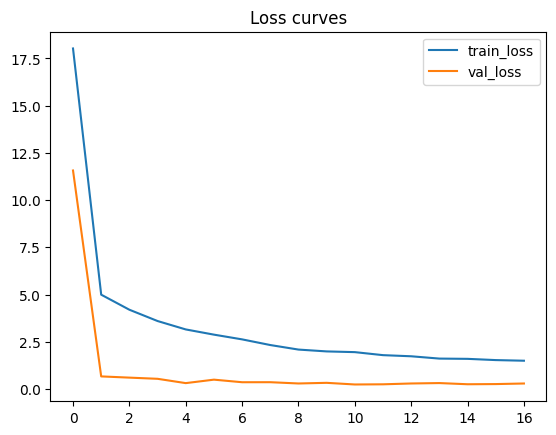

In [ ]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='train_loss')  # Training loss
plt.plot(history.history['val_loss'], label='val_loss')  # Validation loss
plt.legend()  # Show legend
plt.title("Loss curves")  # Add title
plt.show()  # Display plot
